In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import tarfile
from zipfile import ZipFile

In [4]:
data_dir = '../data'
image_dir = '../imgs/images'
patients = os.listdir(data_dir)
images = os.listdir(image_dir)
patients_df = pd.read_csv(data_dir+'/Data_Entry_2017.csv')
patients_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [5]:
patients_df.columns

Index(['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID',
       'Patient Age', 'Patient Gender', 'View Position', 'OriginalImage[Width',
       'Height]', 'OriginalImagePixelSpacing[x', 'y]', 'Unnamed: 11'],
      dtype='object')

In [6]:
labels = dict(patients_df[["Image Index", "Finding Labels"]].values)

In [8]:
for image in images[:2]:
    print(image)
    

00000001_000.png
00000001_001.png


C:\Users\micka\Anaconda3\envs\tensorflow-sessions\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Cardiomegaly
Cardiomegaly|Emphysema
Cardiomegaly|Effusion
No Finding
Hernia


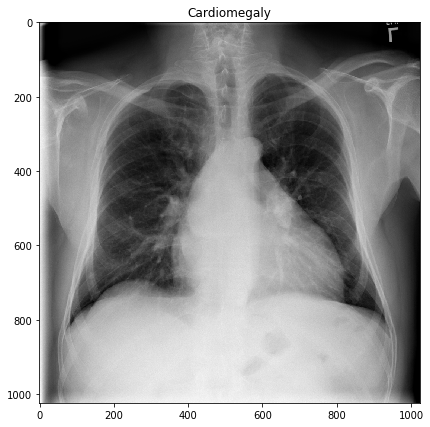

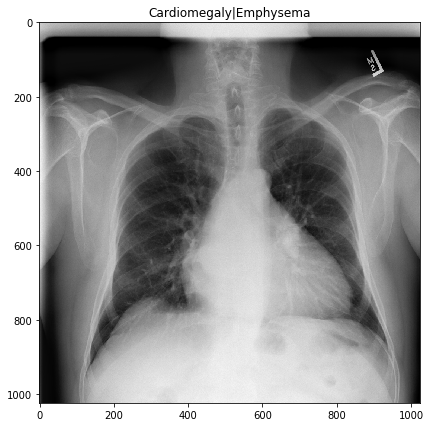

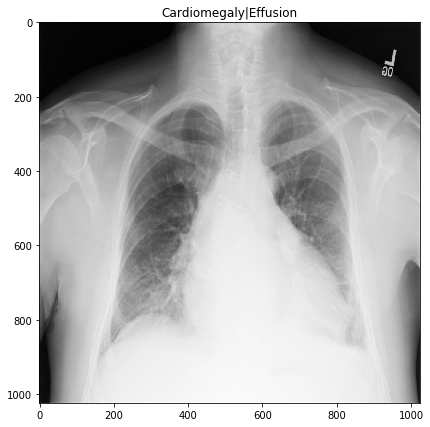

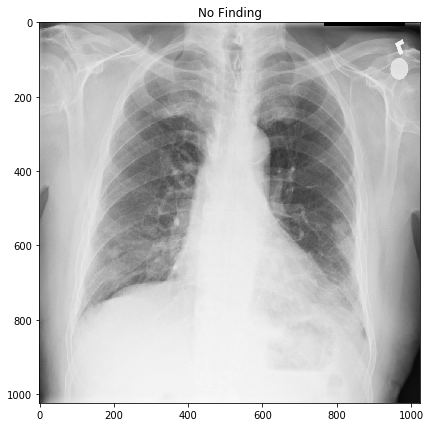

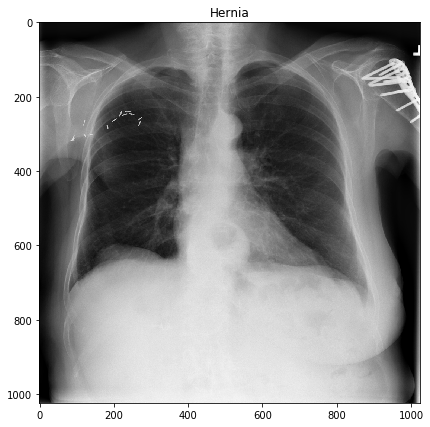

In [39]:
for image in images[:5]:
    f = plt.figure(figsize=(7,7))
    img = np.expand_dims(ndimage.imread(image_dir + '/'+image),0 )
    print(labels[image])
    plt.imshow(img[0], cmap='gray')
    plt.title(labels[image])